### Import module

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import MultiLabelBinarizer

### Read dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/stackoverflow.csv', index_col = 0)
df.head(2)

,Text,Tags
2,aspnet site maps has anyone got experience cre...,"['sql', 'asp.net']"
4,adding scripting functionality to net applicat...,"['c#', '.net']"


In [3]:
df['Tags'] = df.Tags.apply(eval)

In [5]:
#df.to_pickle('dara.pkl')

### EDA

<Axes: >

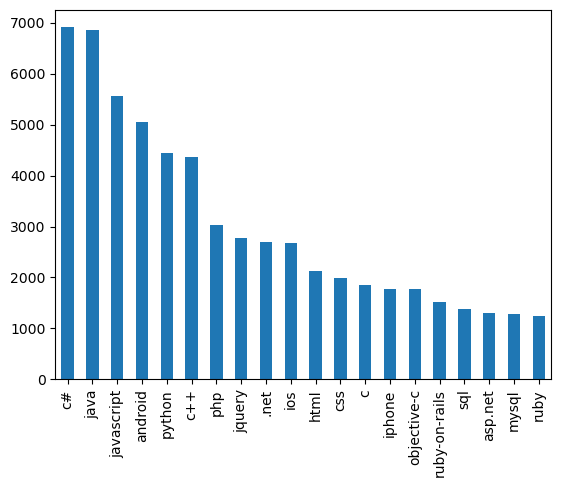

In [12]:
df.Tags.explode().value_counts().plot(kind='bar')

### Feature Extraction

##### Tf-Idf vecorizer

In [17]:
tfidf = TfidfVectorizer(lowercase=True,analyzer='word',ngram_range=(1,3),max_features = 1000,stop_words="english")
tfidf.fit(df.Text)
x = tfidf.fit_transform(df.Text)

In [18]:
x.shape

(48976, 1000)

In [20]:
multi_label = MultiLabelBinarizer()
multi_label.fit(df.Tags)
y = multi_label.fit_transform(df.Tags)

In [21]:
y.shape

(48976, 20)

### split data

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Model